In [1]:
import math
import pandas as pd
import arrow
import ipynb 
import os.path
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from dotenv import load_dotenv
from networkx.algorithms import bipartite
from importlib import reload

load_dotenv(verbose=True)

import pandas as pd
pd.options.mode.chained_assignment = None  

In [5]:
query = {
    "field_ids": [
        "announced_on",
        "funding_round_identifier",
        "funding_round_money_raised",
        "identifier",
        "investor_identifier",
        "investor_stage",
        "investor_type",
        "money_invested",
        "name",
        "organization_identifier"
    ],
    "limit": 500,
    "query": [
        {
          "type": "predicate",
          "field_id": "location_identifiers",
          "operator_id": "includes",
          "values": ["Switzerland"]
        },
     ]
}

df = df_from_api_CB (query, "investments")

TypeError: list indices must be integers or slices, not str

In [ ]:
df.head()

In [ ]:
# columns to drop
columns_to_drop = ["uuid", 
                   "properties.identifier.entity_def_id", 
                   "properties.money_invested.value_usd", 
                   "properties.money_invested.currency", 
                   "properties.money_invested.value", 
                   "properties.organization_identifier.permalink",
                   "properties.organization_identifier.image_id",
                   "properties.organization_identifier.uuid",
                   "properties.organization_identifier.entity_def_id",
                   "properties.funding_round_identifier.permalink",
                   "properties.funding_round_identifier.image_id",
                   "properties.name"
                    ]

# remove useless columns
df = df.drop(columns_to_drop, axis=1)  

# rename columns
df = df.rename(columns = {'properties.investor_identifier.value': 'investor_name', 
                          'properties.organization_identifier.value': 'organisation_name',
                          'properties.funding_round_money_raised.value_usd': 'investments_usd'})

df.head()

In [ ]:
df.iloc[0]["properties.identifier.permalink"]

In [ ]:
df.iloc[0]["investor_name"]

In [ ]:
df.iloc[0]["organisation_name"]

In [ ]:
df.columns

In [ ]:
df_essential = df[["organisation_name", "investor_name", "investments_usd"]]
df_essential.head()

In [ ]:
# delete value with NaN investments

df_essential.dropna(subset = ["investments_usd"], inplace=True)

df_essential.head()

In [109]:
len(df_essential)

394

In [110]:
# total amount of investments for each company

df_num_inves_per_company = df_essential[["investments_usd", "organisation_name"]].groupby("organisation_name").sum()

df_num_inves_per_company = df_num_inves_per_company.sort_values("investments_usd", ascending=False)

df_num_inves_per_company.head()

,investments_usd
organisation_name,
Eskom Holdings,2.506009e+09
Lineage Logistics,1.900000e+09
Verily,7.000000e+08
Seaspan Corporation,5.000000e+08
Blockchain.com,3.000000e+08


In [111]:
# total amount of investments for each investors

df_num_inves_per_company = df_essential[["investments_usd", "investor_name"]].groupby("investor_name").sum()

df_num_inves_per_company = df_num_inves_per_company.sort_values("investments_usd", ascending=False)

df_num_inves_per_company.head()

,investments_usd
investor_name,
China Development Bank,2.506009e+09
OPTrust Private Markets Group,1.900000e+09
Alphabet,7.000000e+08
Fairfax Financial Holdings,5.000000e+08
Lightspeed Venture Partners,3.000000e+08


In [112]:
# number of investments for each company

df_num_inves_per_company = df_essential[["investments_usd", "organisation_name"]].groupby("organisation_name").count()

df_num_inves_per_company = df_num_inves_per_company.sort_values("investments_usd", ascending=False)

df_num_inves_per_company.head()

,investments_usd
organisation_name,
DipJar,2
Gorgias,2
CloudNC,2
Veoh,2
PingCAP,1


In [113]:
# number of investments for each investors

df_num_inves_per_company = df_essential[["investments_usd", "investor_name"]].groupby("investor_name").count()

df_num_inves_per_company = df_num_inves_per_company.sort_values("investments_usd", ascending=False)

df_num_inves_per_company.head()

,investments_usd
investor_name,
New Enterprise Associates,3
EASME - EU Executive Agency for SMEs,3
Goldman Sachs,2
NYSERDA,2
Austin Ventures,2


### Graph

In [114]:
df_graph = df[["organisation_name", "investor_name"]]
df_graph = df_graph.set_index("organisation_name")
df_graph.head()

,investor_name
organisation_name,
Techpoint,Mobile Internet Capital
Adagio Therapeutics,M28 Capital
Riparian Pharmaceuticals,Viva Ventures Biotech Fund
Green Earth Institute,PNB-INSPiRE Ethical Fund 1 Investment Business...
Carbon,Next Play Capital


In [3]:
# import functions from py file 

import function
reload(function)
from function import nx_dip_graph_from_pandas, plot_bipartite_graph, filter_dict, df_from_api_CB, extract_nodes

In [116]:
# create the bipartite network

B = nx_dip_graph_from_pandas(df_graph)


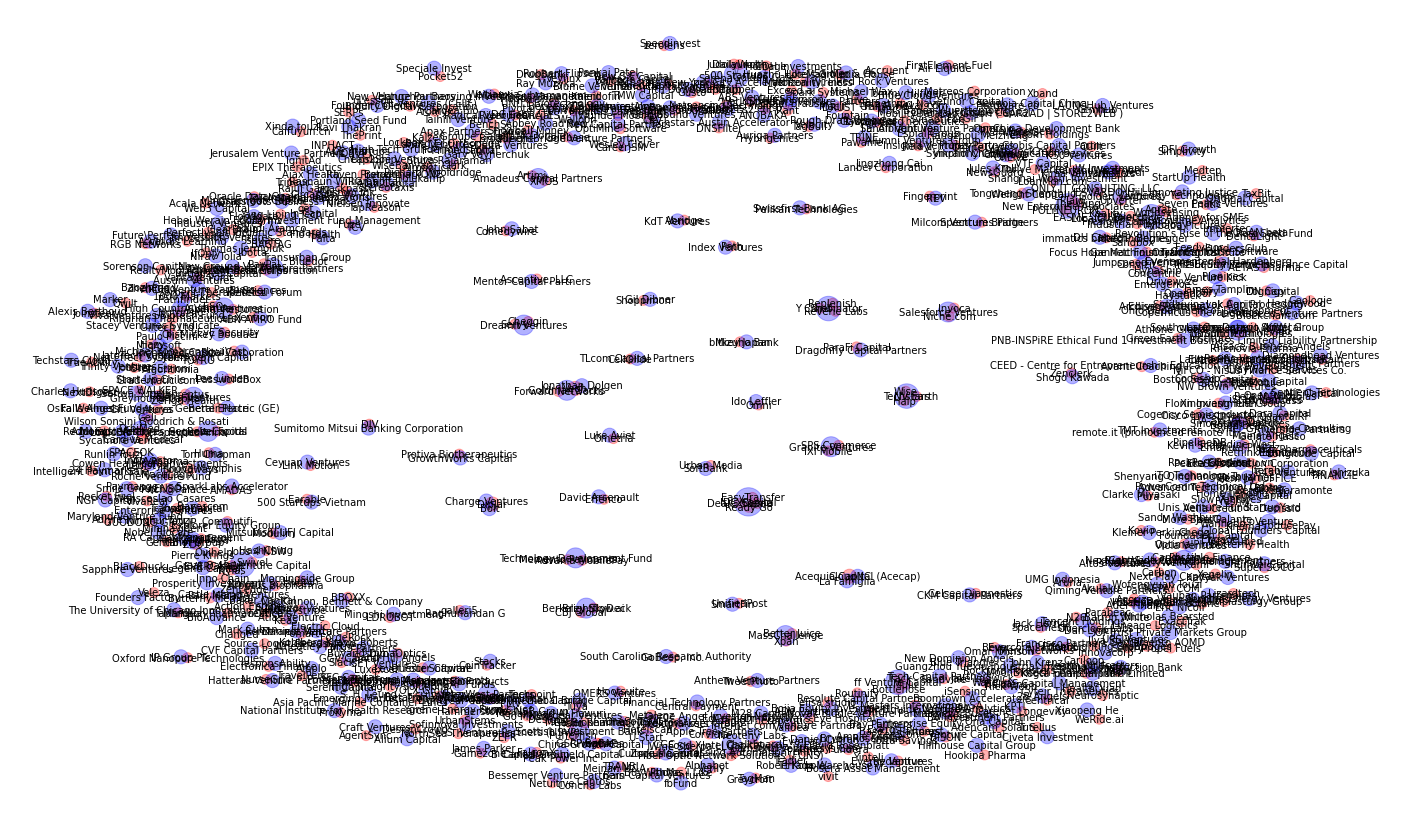

In [117]:
plot_bipartite_graph(B, small_degree=True)